In [16]:
import numpy as np
import numpy.linalg as LA
from scipy import integrate
import matplotlib.pyplot as plt

## Метод колокації для інтегрального рівняння Фредгольма другого роду

Маємо інтегральне рівняння вигляду

$$
\varphi(x)-\lambda \int_{a}^{b} \varphi(y) K(x, y) d y = f(x), \quad x \in[a, b]
$$

Наближений розв'язок будемо шукати у вигляді

$$
\tilde{\varphi}(x)=\sum_{j=1}^{n} c_{j} \gamma_{j}(x)
$$

де $c_j$ - невідомі константи, які потрібно знайти, а $\gamma_j$ - задані лінійнонезалежні функції (в нашому випадку кусково аналітичні), $j = 1, ..., n$.

Тоді отримаємо такий вираз

$$
\sum_{j=1}^{n} c_{j}\left[\gamma_{j}(x)-\lambda \int_{a}^{b} K(x, y) \gamma_{j}(y) d y\right]=f(x)
$$

Розглянувши його на множині точок $x_i$, таких, що
$$
a \leqslant x_{1}<x_{2}<\ldots<x_{m} \leqslant b
$$

отримаємо СЛАР відносно невідомих $с_j$, $j = 1, ..., n$. 

In [35]:
a, b = -1, 1
K = lambda x, y: x*y + x**2
f = lambda x: 1
lambd = 1
h = 0.1

In [36]:
xx = np.arange(a, b + 0.000001, h).round(3).tolist()
n = len(xx)
A = np.zeros((n,n)).tolist()

In [37]:
def basicFunction(j, x, xx=xx, h=h):
  n = len(xx)-1 ## TODO
  
  if j >=1 and xx[j-1] <= x <= xx[j]:
    return (x - xx[j-1])/h
  elif j <= n-1 and xx[j] <= x <= xx[j+1]:
    return (xx[j+1] - x)/h
  else:
    return 0

In [38]:
for i in range(n):
  for j in range(n):
    
    Kxi_li= lambda s: K(xx[i], s) * basicFunction(j, s)
    
    (integral, err) = integrate.quad(Kxi_li, a, b)
    
    A[i][j] = basicFunction(j, xx[i]) - integral
    
#np.round(A, 3)

<ipython-input-38-5d633b721336>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  (integral, err) = integrate.quad(Kxi_li, a, b)


In [39]:
A = np.array(A, dtype='float')
A.shape

(21, 21)

In [40]:
ff = np.array([[f(xx[j])] for j in range(n)], dtype='float')
ff.shape

(21, 1)

In [41]:
LA.det(A)

0.1099999999895269

In [42]:
c = LA.solve(A, ff)

In [43]:
def y_approx(x, c=c):
  return sum(c[i][0]*basicFunction(i, x) for i in range(n))

In [44]:
y = lambda x: 6*x**2 + 1

In [45]:
print(y(0.543), y_approx(0.543))
print(y(0.734), y_approx(0.734))
print(y(1), y_approx(1))
print(y(2), y_approx(2))

2.769094 2.8018181815050287
4.232536 4.2787878793818415
7 7.06060605953863
25 0.0


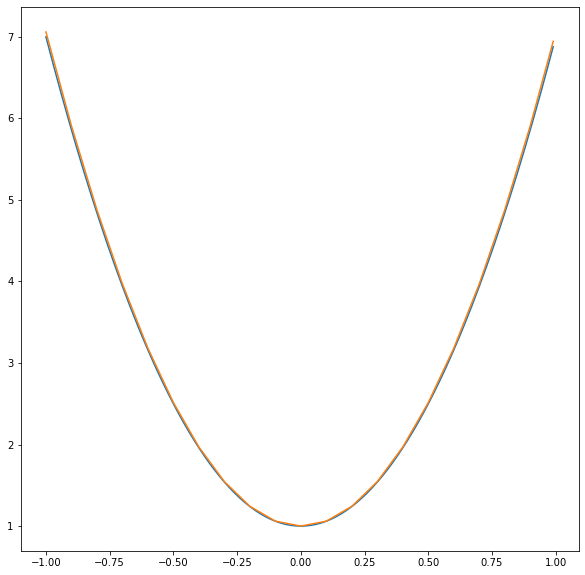

In [46]:
p = np.arange(a, b, 0.01)

plt.figure(figsize = (10,10))
plt.plot(p, y(p), p, [y_approx(p_) for p_ in p])